# DSCI 525 - Web and Cloud Computing

Link to github repo for this milestone: https://github.com/UBC-MDS/DSCI525-Group7/blob/main/notebooks/Milestone4/Milestone4.ipynb

***Milestone 4:*** In this milestone, you will deploy the machine learning model you trained in milestone 3.

You might want to go over [this sample project](https://github.ubc.ca/mds-2021-22/DSCI_525_web-cloud-comp_students/blob/master/release/milestone4/sampleproject.ipynb) and get it done before starting this milestone.

Milestone 4 checklist :

- [x] Use an EC2 instance.
- [x] Develop your API here in this notebook.
- [x] Copy it to ```app.py``` file in EC2 instance.
- [x] Run your API for other consumers and test among your colleagues.
- [x] Summarize your journey.

In this milestone, you will do certain things that you learned. For example...
- Login to the instance
- Work with Linux and use some basic commands
- Configure security groups so that it accepts your webserver requests from your laptop
- Configure AWS CLI

In some places, I explicitly mentioned these to remind you.

In [2]:
## Import all the packages that you need
from flask import Flask, request, jsonify
import joblib
import numpy as np

## 1. Develop your API

rubric={mechanics:45}

You probably got how to set up primary URL endpoints from the [sampleproject.ipynb](https://github.ubc.ca/mds-2021-22/DSCI_525_web-cloud-comp_students/blob/master/release/milestone4/sampleproject.ipynb) and have them process and return some data. Here we are going to create a new endpoint that accepts a POST request of the features required to run the machine learning model that you trained and saved in last milestone (i.e., a user will post the predictions of the 25 climate model rainfall predictions, i.e., features,  needed to predict with your machine learning model). Your code should then process this data, use your model to make a prediction, and return that prediction to the user. To get you started with all this, I've given you a template that you should fill out to set up this functionality:

***NOTE:*** You won't be able to test the flask module (or the API you make here) unless you go through steps in ```2. Deploy your API```. However, you can make sure that you develop all your functions and inputs properly here.

```python
from flask import Flask, request, jsonify
import joblib
import numpy as np
## Import any other packages that are needed

app = Flask(__name__)

# 1. Load your model here
model = joblib.load(...)

# 2. Define a prediction function
def return_prediction(...):

    # format input_data here so that you can pass it to model.predict()

    return model.predict(...)

# 3. Set up home page using basic html
@app.route("/")
def index():
    # feel free to customize this if you like
    return """
    <h1>Welcome to our rain prediction service</h1>
    To use this service, make a JSON post request to the /predict url with 25 climate model outputs.
    """

# 4. define a new route which will accept POST requests and return model predictions
@app.route('/predict', methods=['POST'])
def rainfall_prediction():
    content = request.json  # this extracts the JSON content we sent
    prediction = return_prediction(...)
    results = {...}  # return whatever data you wish, it can be just the prediction
                     # or it can be the prediction plus the input data, it's up to you
    return jsonify(results)
```

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np
## Import any other packages that are needed

app = Flask(__name__)

# 1. Load your model here
model = joblib.load('model.joblib')

# 2. Define a prediction function
def return_prediction(content):
    # format input_data here so that you can pass it to model.predict()
    
    return model.predict(np.array(content).reshape(1, -1))

# 3. Set up home page using basic html
@app.route("/")
def index():
    # feel free to customize this if you like
    return """
    <h1>Welcome to our rain prediction service</h1>
    To use this service, make a JSON post request to the /predict url with 25 climate model outputs.
    
    You may use the following curl command:
    curl -X POST http://54.202.154.96:8080/predict -d '{"data":[1,2,3,4,53,11,22,37,41,53,11,24,31,44,53,11,22,35,42,53,12,23,31,42,53]}' -H "Content-Type: application/json"
    """

# 4. define a new route which will accept POST requests and return model predictions
@app.route('/predict', methods=['POST'])
def rainfall_prediction():
    content = request.json  # this extracts the JSON content we sent

    prediction = round(return_prediction(content['data'])[0],2)
    results = {"Output": f"Prediction: {prediction} mm of rainfall!"}  # return predictions
        
    rtn = jsonify(results)
    return rtn

## 2. Deploy your API

rubric={mechanics:40}

Once your API (app.py) is working, we're ready to deploy it! For this, do the following:

1. Setup an EC2 instance. Make sure you add a rule in security groups to accept `All TCP` connections from `Anywhere`. SSH into your EC2 instance from milestone2.
2. Make a file `app.py` file in your instance and copy what you developed above in there. 

    2.1 You can use the Linux editor using ```vi```. More details on vi Editor [here](https://www.guru99.com/the-vi-editor.html). Use your previous learnings, notes, mini videos, etc. You can copy code from your jupyter and paste it into `app.py`.
    
    2.2 Or else you can make a file in your laptop called app.py and copy it over to your EC2 instance using ```scp```. Eg: ```scp -r -i "ggeorgeAD.pem" ~/Desktop/app.py  ubuntu@ec2-xxx.ca-central-1.compute.amazonaws.com:~/```

3. Download your model from s3 to your EC2 instance. You want to configure your S3 for this. Use your previous learnings, notes, mini videos, etc.
4. You should use one of those package managers to install the dependencies of your API, like `flask`, `joblib`, `sklearn`, etc...

    4.1. (Additional help) you can install the required packages inside your terminal.
        - Install conda:
            wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
            bash Miniconda3-latest-Linux-x86_64.sh
        - Install packages (there might be others): 
            conda install flask scikit-learn joblib

5. Now you're ready to start your service, go ahead and run `flask run --host=0.0.0.0 --port=8080`. This will make your service available at your EC2 instance's `Public IPv4 address` on port 8080. Please ensure that you run this from where ```app.py``` and ```model.joblib``` reside.
6. You can now access your service by typing your EC2 instances `public IPv4 address` append with `:8080` into a browser, so something like `http://Public IPv4 address:8080`. From step 4, you might notice that flask output saying "Running on http://XXXX:8080/ (Press CTRL+C to quit)", where XXXX is `Private IPv4 address`, and you want to replace it with the `Public IPv4 address`
7. You should use `curl` to send a post request to your service to make sure it's working as expected.
>EG: curl -X POST http://your_EC2_ip:8080/predict -d '{"data":[1,2,3,4,53,11,22,37,41,53,11,24,31,44,53,11,22,35,42,53,12,23,31,42,53]}' -H "Content-Type: application/json"

8. Now, what happens if you exit your connection with the EC2 instance? Can you still reach your service?
9. We could use several options to help us persist our server even after we exit our shell session. We'll be using `screen`. `screen` will allow us to create a separate session within which we can run `flask` and won't shut down when we exit the main shell session. Read [this](https://linuxize.com/post/how-to-use-linux-screen/) to learn more on ```screen```.
10. Now, create a new `screen` session (think of this as a new, separate shell), using: `screen -S myapi`. If you want to list already created sessions do ```screen -list```. If you want to get into an existing ```screen -x myapi```.
11. Within that session, start up your flask app. You can then exit the session by pressing `Ctrl + A then press D`. Here you are detaching the session, once you log back into EC2 instance you can attach it using ```screen -x myapi```.
12. Feel free to exit your connection with the EC2 instance now and try reaccessing your service with `curl`. You should find that the service has now persisted!
13. ***CONGRATULATIONS!!!*** You have successfully got to the end of our milestones. Move to Task 3 and submit it.

## 3. Summarize your journey from Milestone 1 to Milestone 4
rubric={mechanics:10}
>There is no format or structure on how you write this. (also, no minimum number of words).  It's your choice on how well you describe it.

### Milestone 1
We started the project by working with a much larger dataset (5GB) than those we have worked with before and encountered different issues on our local computers with low-end specifications. These issues include longer duration and memory in performing tasks of merging data and processing data. We then looked into various methods and learnt that Dask is a tool that we can consider to use to optimize the process when working on local computers. Finally, we experimented with different methods of transferring data to optimize the task with Feather, Parquet and partitioned Parquet. We learnt that Parquet would be a good tool to optimize time and memory when dealing with large files. After this comparison exercise, we came to appreciate the role of cloud computing that could offer higher efficiency and resources for processing large data.

### Milestone 2
In milestone 2, our goal was to set up a server in the cloud, move data from our local machine to the AWS cloud and make it ready for machine learning. To accomplish this, we set up an EC2 instance with JupyterHub, installed dependencies and AWS CLI in the UNIX server, and set up our S3 bucket. We then moved the raw data from milestone 1 to the S3 bucket using AWS CLI, and wrangled the data into a suitable format for training a machine learning model. Finally we sent the processed data to S3 bucket in the cloud.

### Milestone 3
In Milestone 3, we put into practice our knowledge of EMR instances, Spark and Hadoop, and saw in action how those can aid in the process of model training and hyperparameter optimization. First, we read the data from our AWS S3 bucket. Then we split that data for training and testing. We performed some high-level EDA on the rainfall data. We created a RandomForest model for predicting future rainfall. Then we got to use new technologies covered in lectures 5 and 6. We created an EMR instance and used it to start a Jupyter notebook, where we performed model training with support of Spark to speed up the weighty hyperparameter optimization procedure.

### Milestone 4
We learned how to deploy our machine learning climate model in a production environment so that it can be accessed by other users to make predictions by passing inputs. In order to achieve this, we deployed our climate model as a REST API using the FLASK web framework. We created a python script, app.py, and hosted it on our Amazon EC2 instance. This app consisted of the code to create the Flask web framework and also a new endpoint, "predict", which accepts a POST request of the features (inputs for the 25 climate models). This input is captured through request.json and then passed on to the climate model to make a prediction, which is returned as an output JSON string.

----

Overall, the entire project went very smoothly. We now have the general understanding of some of the powerful tools out there for collaborating on a project, and for tackling either very large amounts of data or very memory-heavy operations. As with a lot of MDS classes, it would be great if there was a little more time to get more practice and go in-depth, but this is a solid base and gives us confidence for being able to get a kickstart on some data engineering and architecture in the wild.

## 4. Submission instructions
rubric={mechanics:5}

In the textbox provided on Canvas please put a link where TAs can find the following-
- [x] This notebook with solution to ```1 & 3```
- [x] Screenshot from 
    - [x] Output after trying curl. Here is a [sample](https://github.ubc.ca/mds-2021-22/DSCI_525_web-cloud-comp_students/blob/master/release/milestone4/images/curl_deploy_sample.png). This is just an example; your input/output doesn't have to look like this, you can design the way you like. But at a minimum, it should show your prediction value.

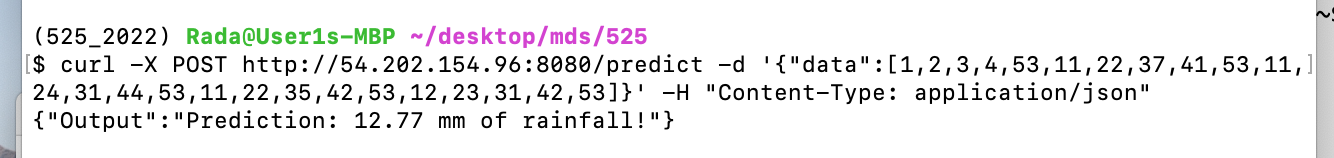